In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

#1. 파이토치로 소프트맥스의 비용함수 구현(로우-레벨)

In [ ]:
z = torch.FloatTensor([1, 2, 3])

In [ ]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
hypothesis.sum()

tensor(1.)

In [ ]:
z = torch.rand(3, 5, requires_grad = True)

In [ ]:
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [ ]:
y = torch.randint(5,(3,)).long()
print(y)

tensor([0, 2, 1])


In [ ]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


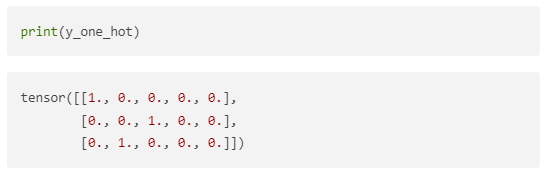

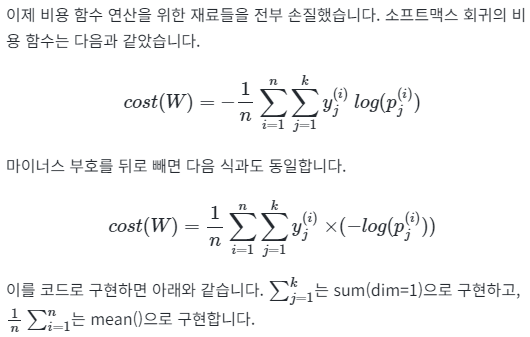

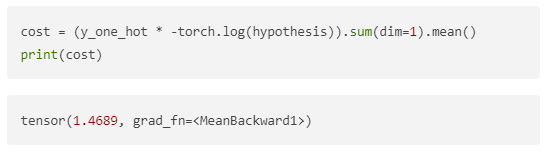

#2. 파이토치로 소프트맥스의 비용 함수 구현하기(하이-레벨)

##1) F.softmax()+torch.log() = F.log_softmax()

In [ ]:
# Low level
torch.log(F.softmax(z, dim = 1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [ ]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

##2) F.log_softmax() + F.nll_loss = F.cross_entropy()

In [ ]:
# Low level
# 첫 번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim = 1))).sum(dim=1).mean()

NameError: name 'y_one_hot' is not defined

In [ ]:
# 두번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

In [ ]:
# High level
# 세번째 수식
F.nll_loss(F.log_softmax(z, dim=1), y)

 nll : Negative Log Likelihood의 약자

 nll_loss는 F.log_softmax()를 수행한 후에 남은 수식들을 수행

 F.cross_entropy()는 F.log_softmax()와 F.nll_loss()를 포함

In [ ]:
# 네번째 수식
F.cross_entropy(z, y)